In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd

In [2]:
filepath = "opera-network.csv"
data = pd.read_csv(filepath)
data.drop("rism_id",axis=1,inplace=True)
data.head()

,composer,librettist,title,performance_year,placename
0,"Paisiello, Giovanni","Metastasio, Pietro",Achille in Sciro,1778,Sankt Petersburg
1,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1799,Venezia
2,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1808,Dresden
3,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1815,Hamburg
4,"Anfossi, Pasquale","Metastasio, Pietro",Adriano in Siria,1777,Padova


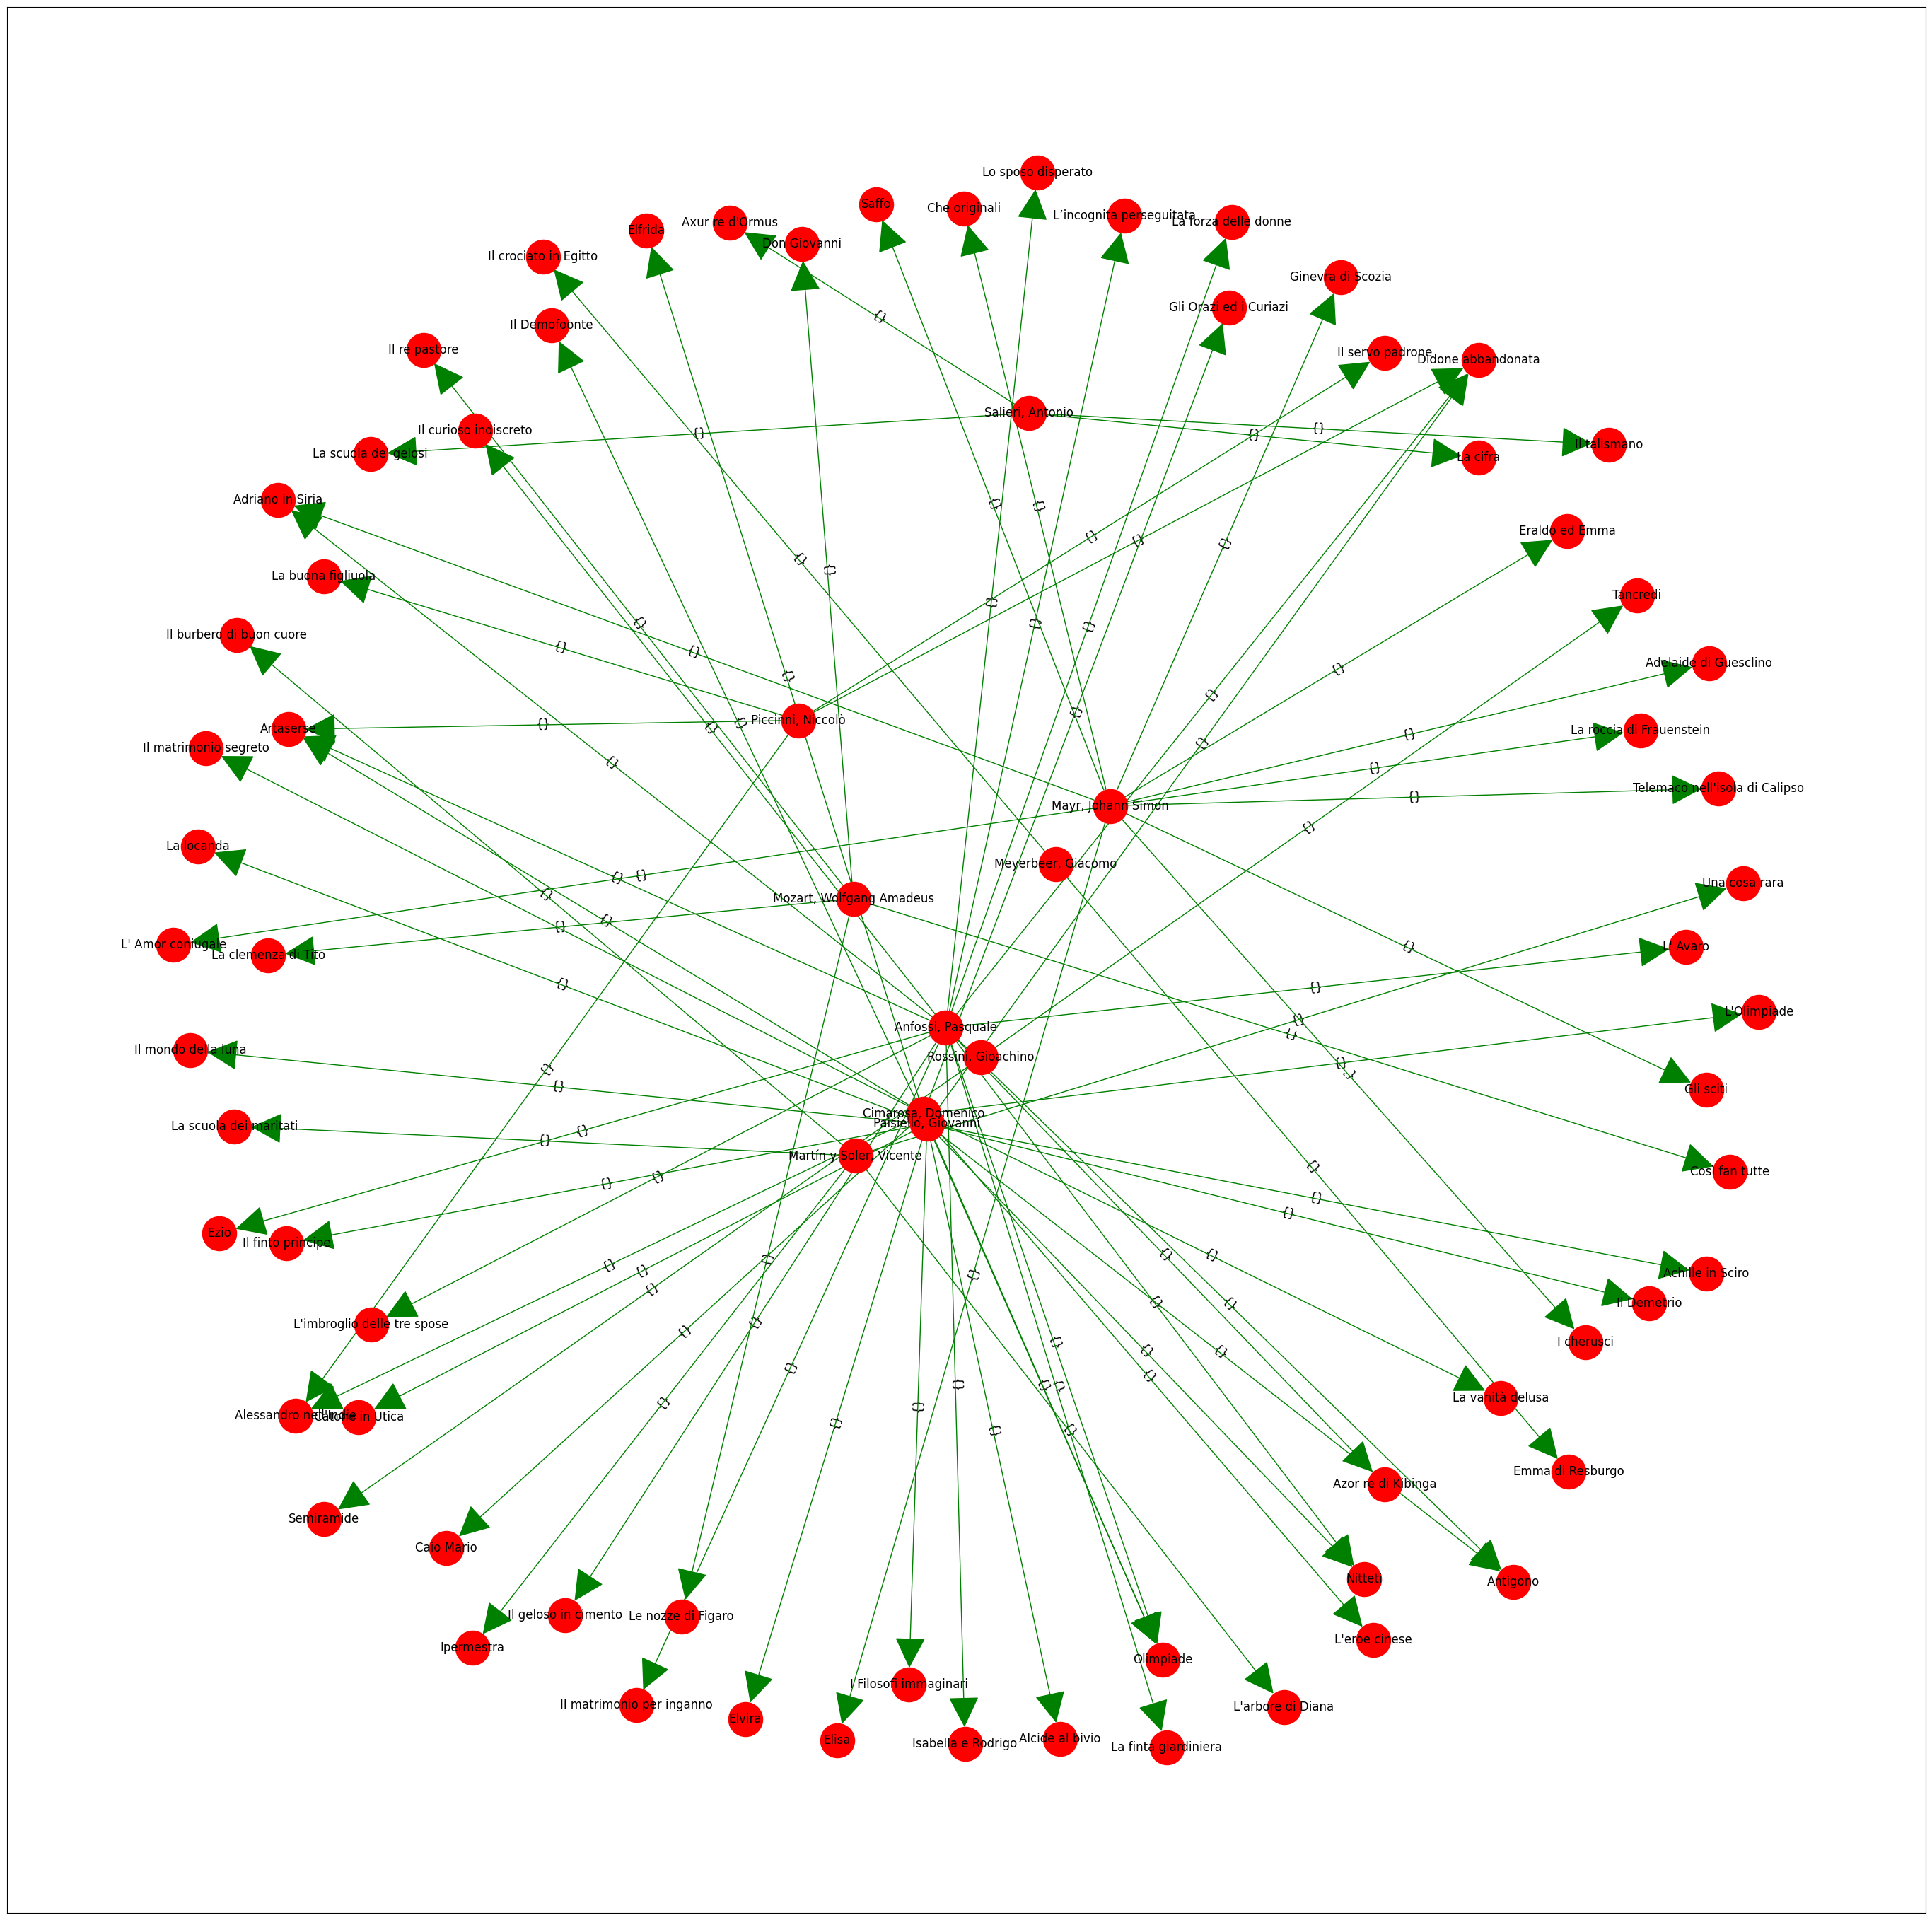

In [3]:
G = nx.from_pandas_edgelist(data, source='composer', target='title', create_using= nx.DiGraph)
pos = nx.spring_layout(G)
plt.figure(figsize=(35, 35))
nx.draw_networkx_edge_labels(G,pos=pos, font_size= 12 )
nx.draw_networkx(G, pos, with_labels=True, node_color='r', edge_color='g', node_size=1200, arrowsize= 70)
plt.show()

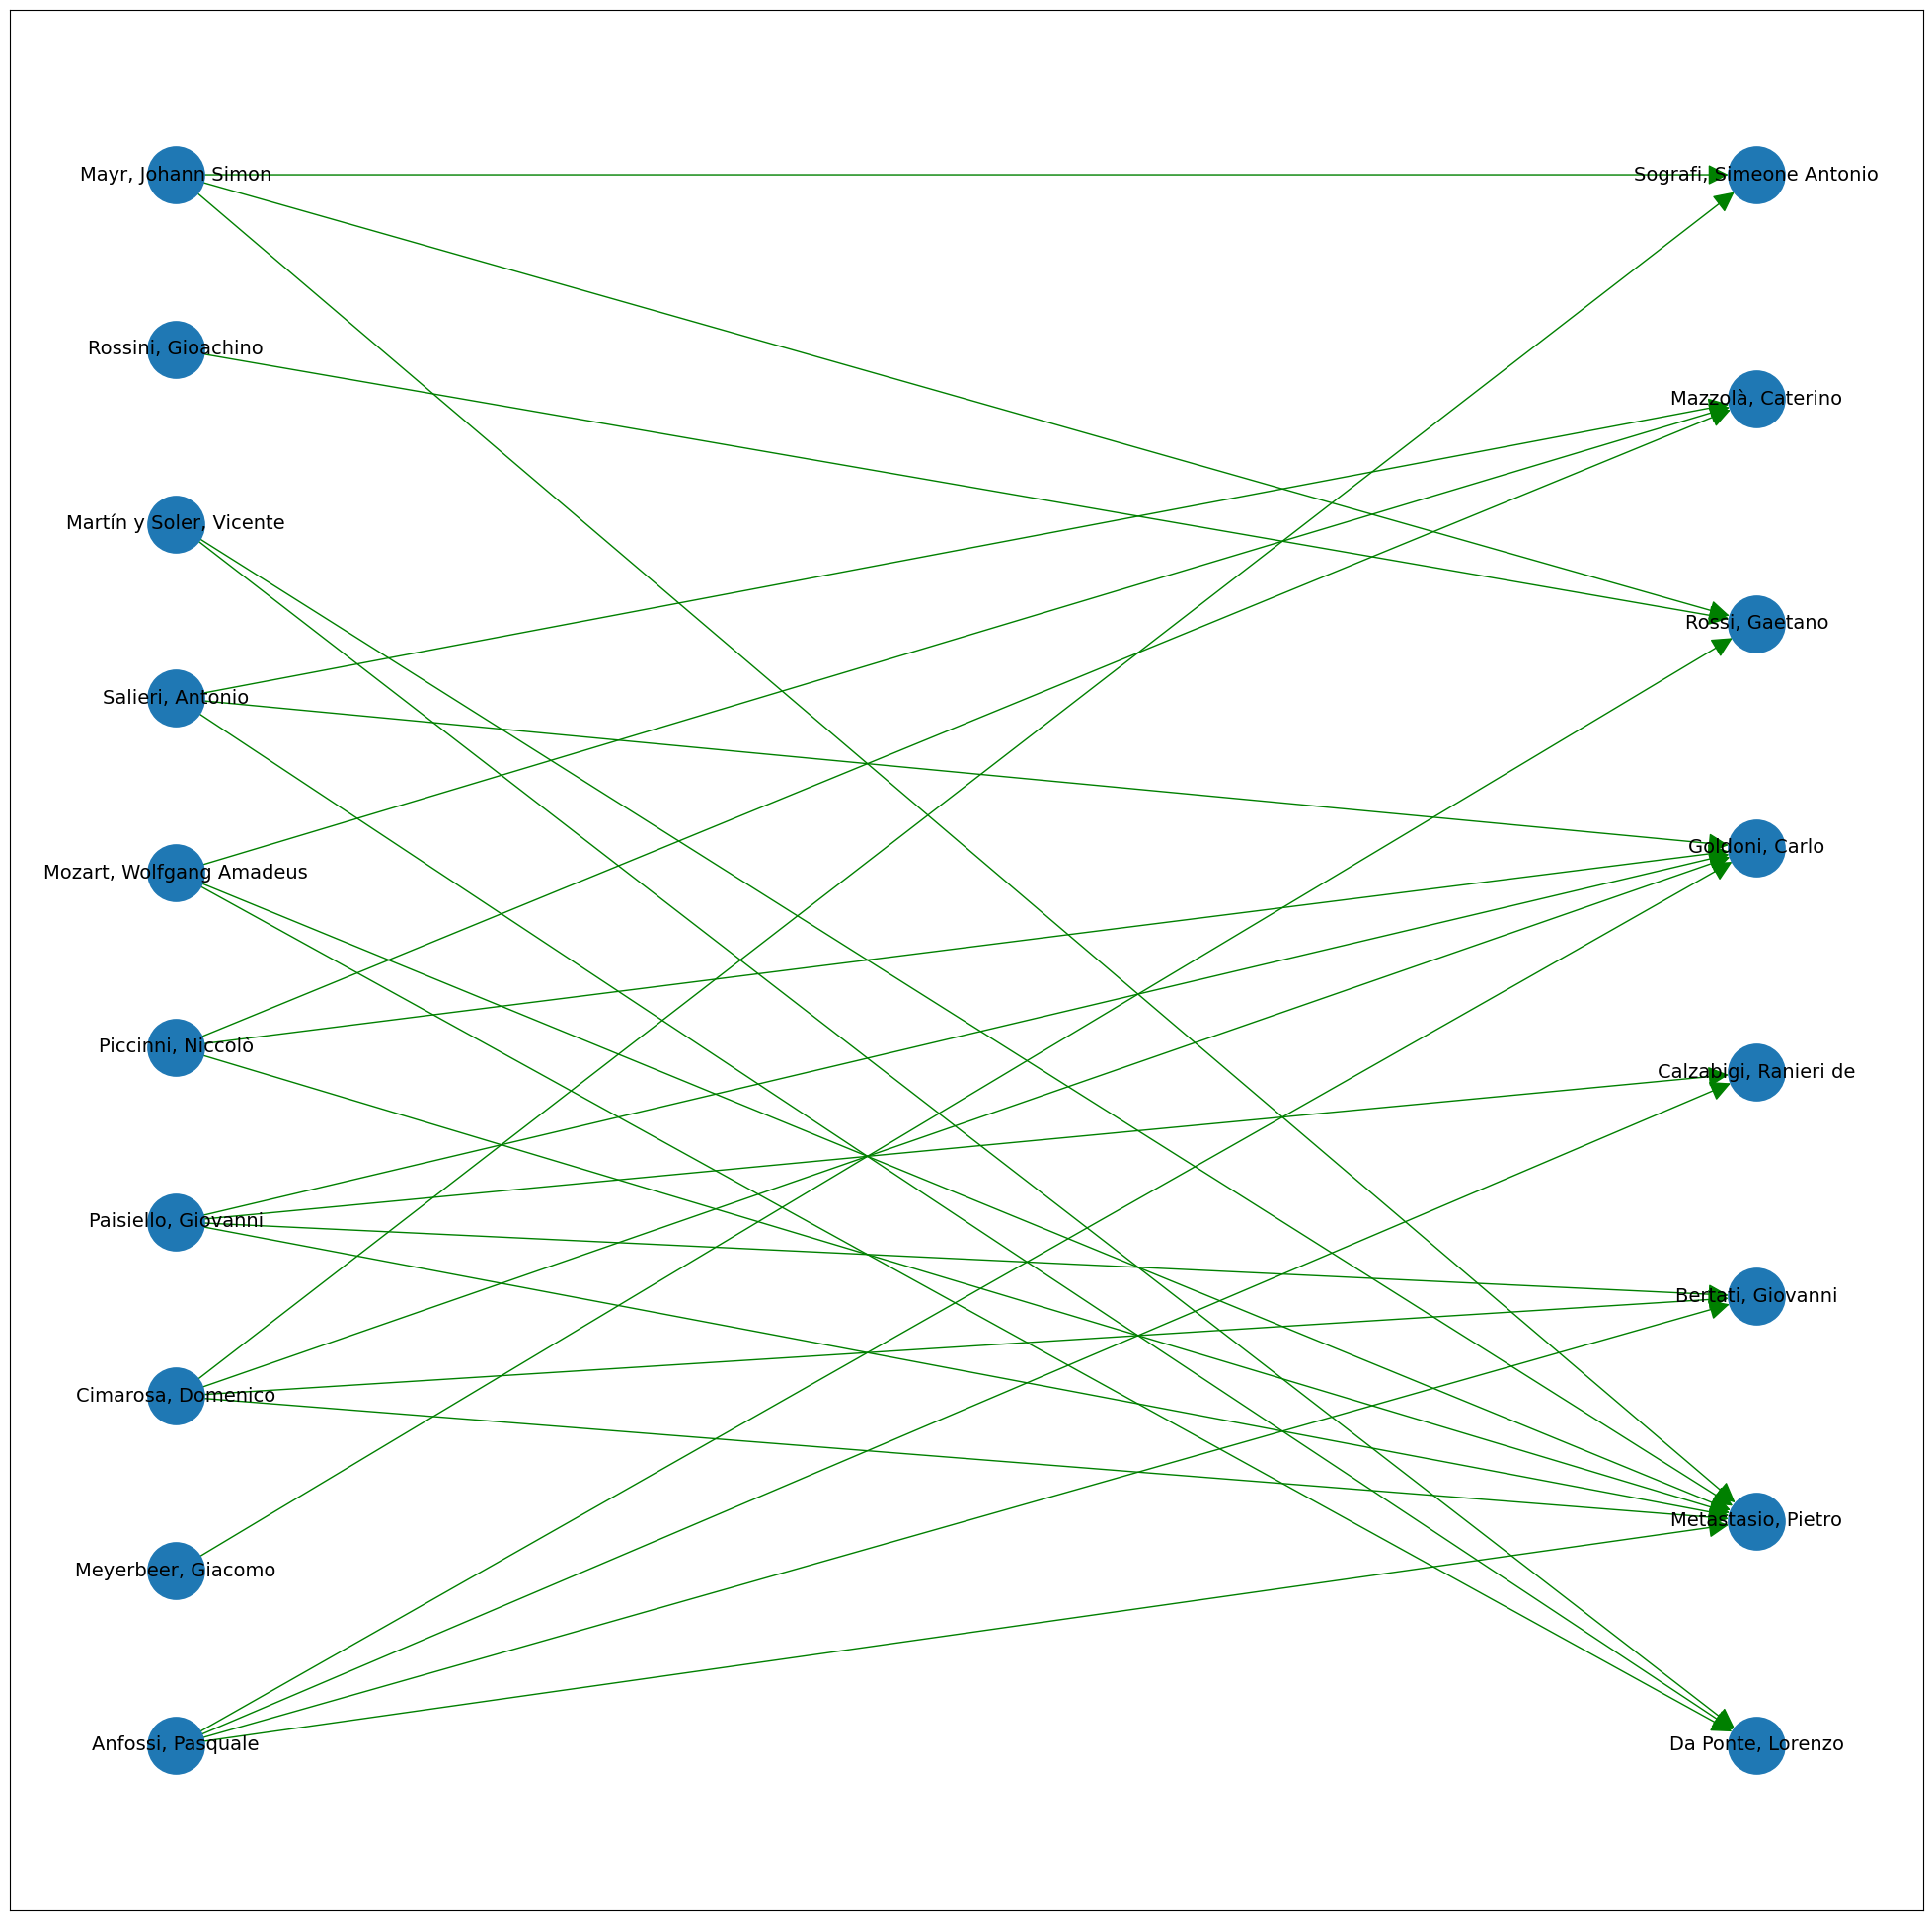

In [4]:
#bipartite layout
G = nx.DiGraph()
from networkx.drawing.layout import bipartite_layout
composer = data['composer']
librettist = data['librettist']
Edge = pd.DataFrame({"source":composer, "target":librettist})
G.add_nodes_from(composer, bipartite=0, node_color='y')
G.add_nodes_from(librettist, bipartite=1, node_color='b')
G.add_edges_from(tuple(x) for x in Edge.values)
plt.figure(figsize=(25, 25))
pos = bipartite_layout(G, composer)
nx.draw_networkx(G,pos, node_size= 1700, edge_color='g', arrowsize=32, font_size=14, with_labels=True)
plt.show()

In [28]:
#map
from geopy.geocoders import Nominatim
# Crea un oggetto "geocoder" utilizzando il provider Nominatim
geocoder = Nominatim(user_agent="my_app")

data["latitude"] = None
data["longitude"] = None

for index, row in data.iterrows():
    city = row["placename"]
    location = geocoder.geocode(city)
    data.at[index, "latitude"] = location.latitude
    data.at[index, "longitude"] = location.longitude



In [30]:
data.to_csv("opera.csv",index=False)

In [35]:
import geojson
import csv
import json

# Crea l'oggetto GeoJSON vuoto
geojson = {
    "type": "FeatureCollection",
    "features": []
}
# Apri il file CSV
with open('opera.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        placename = row['placename']
        title = row['title']
        lon = row['longitude']
        lat = row['latitude']

        feature = {
            "type": "Feature",
            "properties": {
                "placename": placename,
                "title": title
            },
            "geometry": {
                "type": "Point",
                "coordinates": [lon, lat]
            }
        }
        geojson['features'].append(feature)
# Scrivi il file GeoJSON
with open('file.geojson', 'w') as f:
    json.dump(geojson, f)

In [36]:
print(geojson)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'placename': 'Sankt Petersburg', 'title': 'Achille in Sciro'}, 'geometry': {'type': 'Point', 'coordinates': ['30.316229', '59.938732']}}, {'type': 'Feature', 'properties': {'placename': 'Venezia', 'title': 'Adelaide di Guesclino'}, 'geometry': {'type': 'Point', 'coordinates': ['12.3345898', '45.4371908']}}, {'type': 'Feature', 'properties': {'placename': 'Dresden', 'title': 'Adelaide di Guesclino'}, 'geometry': {'type': 'Point', 'coordinates': ['13.7381437', '51.0493286']}}, {'type': 'Feature', 'properties': {'placename': 'Hamburg', 'title': 'Adelaide di Guesclino'}, 'geometry': {'type': 'Point', 'coordinates': ['10.000654', '53.550341']}}, {'type': 'Feature', 'properties': {'placename': 'Padova', 'title': 'Adriano in Siria'}, 'geometry': {'type': 'Point', 'coordinates': ['11.8734455', '45.4077172']}}, {'type': 'Feature', 'properties': {'placename': 'Venezia', 'title': 'Adriano in Siria'}, 'geometry': {'type'

In [39]:
import geojson

with open('opera.geojson') as f:
    geo = geojson.load(f)

In [41]:
print(geo)

{"features": [{"geometry": {"coordinates": [30.316229, 59.938732], "type": "Point"}, "properties": {"composer": "Paisiello, Giovanni", "librettist": "Metastasio, Pietro", "performance_year": 1778, "placename": "Sankt Petersburg", "title": "Achille in Sciro"}, "type": "Feature"}, {"geometry": {"coordinates": [12.33459, 45.437191], "type": "Point"}, "properties": {"composer": "Mayr, Johann Simon", "librettist": "Rossi, Gaetano", "performance_year": 1799, "placename": "Venezia", "title": "Adelaide di Guesclino"}, "type": "Feature"}, {"geometry": {"coordinates": [13.738144, 51.049329], "type": "Point"}, "properties": {"composer": "Mayr, Johann Simon", "librettist": "Rossi, Gaetano", "performance_year": 1808, "placename": "Dresden", "title": "Adelaide di Guesclino"}, "type": "Feature"}, {"geometry": {"coordinates": [10.000654, 53.550341], "type": "Point"}, "properties": {"composer": "Mayr, Johann Simon", "librettist": "Rossi, Gaetano", "performance_year": 1815, "placename": "Hamburg", "titl

In [58]:
import folium
from folium.plugins import MarkerCluster

# crea una mappa centrata sulle coordinate comuni
m = folium.Map(location=[40.8358846, 14.2487679], zoom_start=13)

# crea un layer di punti "cluster"
mc = MarkerCluster()

# aggiungi i features del tuo GeoJSON al layer di punti "cluster"
for feature in geo['features']:
    mc.add_child(folium.Marker(location=feature['geometry']['coordinates'][::-1],
                                popup=format_popup_content(feature),
                                tooltip=feature['properties']['title']))

# aggiungi il layer di punti "cluster" alla mappa
m.add_child(mc)

# visualizza la mappa
m





<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74bf9391-746b-407f-9d8d-996aaba4fe76' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>